# **Tokenizer**

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

texts = ["I love Algeria", "AI", "machine learning", "Artificial intelligence"]
# tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)

print("Total number of documents : \n",tokenizer.document_count)
print("Number of distinct characters/words : \n",len(tokenizer.word_index))
print("word_index  : \n",tokenizer.word_index)

print("word_counts : \n",tokenizer.word_counts)
print("word_docs   : \n",tokenizer.word_docs)

print("-----------------------------------------------------------------------")
print("texts_to_sequences : (Algeria AI) \n",tokenizer.texts_to_sequences(["Algeria AI"]))
print("sequences_to_texts : \n",tokenizer.sequences_to_texts([[3, 4, 7, 2, 8, 1, 3]]))


Total number of documents : 
 4
Number of distinct characters/words : 
 8
word_index  : 
 {'i': 1, 'love': 2, 'algeria': 3, 'ai': 4, 'machine': 5, 'learning': 6, 'artificial': 7, 'intelligence': 8}
word_counts : 
 OrderedDict({'i': 1, 'love': 1, 'algeria': 1, 'ai': 1, 'machine': 1, 'learning': 1, 'artificial': 1, 'intelligence': 1})
word_docs   : 
 defaultdict(<class 'int'>, {'love': 1, 'i': 1, 'algeria': 1, 'ai': 1, 'learning': 1, 'machine': 1, 'intelligence': 1, 'artificial': 1})
-----------------------------------------------------------------------
texts_to_sequences : (Algeria AI) 
 [[3, 4]]
sequences_to_texts : 
 ['algeria ai artificial love intelligence i algeria']


In [3]:
# Let’s encode the full text so each character/word is represented by its ID
# binary, count, freq, tfidf
print("texts_to_matrix : ")
encoded_matrix = tokenizer.texts_to_matrix(texts, mode="binary")
print("Encode the full text : \n",encoded_matrix)


texts_to_matrix : 
Encode the full text : 
 [[0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]


In [4]:
# Texts to Sequences
encoded_sequences = tokenizer.texts_to_sequences(texts)
print("Encode the full text : \n",encoded_sequences)


Encode the full text : 
 [[1, 2, 3], [4], [5, 6], [7, 8]]


In [5]:
# Sequence Padding
from keras.preprocessing.sequence import pad_sequences

# define sequences
sequences = [ [1, 2, 3, 4], [1, 2, 3], [1] ]

# Padding sequence data
"""
maxlen=6

padding	String, "pre" or "post" (optional, defaults to "pre"):
pad either before or after each sequence.

truncating	String, "pre" or "post" (optional, defaults to "pre"):
remove values from sequences larger than maxlen, either at the beginning or at
the end of the sequences.
"""
result = pad_sequences(sequences)
print("result : \n",result)


result : 
 [[1 2 3 4]
 [0 1 2 3]
 [0 0 0 1]]


In [6]:
# Split data into train and test subsets

"""
encoded = np.array(encoded)
dataset_size = tokenizer.document_count
train_size = dataset_size * 80 // 100
test_size  = 1 - train_size
X_train = encoded[:train_size]
X_test  = encoded[train_size:test_size]
print("X_train : \n", X_train)
print("X_test  : \n", X_test)
"""

# encoded_matrix, encoded_sequences
from sklearn.model_selection import train_test_split
y = [0, 1, 1, 0]
X_train, X_test, y_train, y_test = train_test_split(encoded_sequences, y, test_size=0.20,
                                                    random_state=100) # encoded_matrix
print("X_train : \n",X_train)
print("X_test  : \n",X_test)


X_train : 
 [[4], [7, 8], [1, 2, 3]]
X_test  : 
 [[5, 6]]


# **Embedding**

In [7]:
import numpy as np

# Embedding
# input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
# output_dim: Integer. Dimension of the dense embedding.
# input_length: Length of input sequences

input_array = np.array([[5, 3, 10, 4, 9], [ 7, 1, 8, 2, 6]])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=11, output_dim=3))

model.compile("adam", "mse")
output_array = model.predict(input_array)
print("shape : \n",output_array.shape)
print(output_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
shape : 
 (2, 5, 3)
[[[ 0.01390525  0.02635653  0.00806062]
  [ 0.01469035  0.00725223 -0.02203506]
  [-0.04225211  0.03982217  0.03111028]
  [ 0.01010926  0.04089754 -0.01863689]
  [ 0.04285923 -0.04653226 -0.00308894]]

 [[ 0.04537593  0.01735843  0.03820081]
  [ 0.03129592  0.02431161 -0.02286738]
  [-0.02657248 -0.02277364  0.00429315]
  [ 0.01756551  0.03292668 -0.01813414]
  [ 0.00279851  0.0443094  -0.04167342]]]


# **Sentiment Analysis**

In [8]:
# Sentiment Analysis 1

import tensorflow as tf
from tensorflow import keras
import numpy as np

# load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

print("-----------------------------------------------------------------------")
print("X_train : ",X_train.shape," X_test : ",X_test.shape)

for i in range(5):
    print("-----------------------------------")
    print("Exp : ",i," len : ",len(X_train[i])," lable : ",y_train[i])
    print(X_train[i])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
-----------------------------------------------------------------------
X_train :  (25000,)  X_test :  (25000,)
-----------------------------------
Exp :  0  len :  218  lable :  1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194

In [9]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Summarize review length
result = [len(x) for x in X]
print("Review length   : Mean = ",np.mean(result))
print("Classes         : ", np.unique(y))
print("Number of words : ",len(np.unique(np.hstack(X))))


Review length   : Mean =  234.75892
Classes         :  [0 1]
Number of words :  88585


In [10]:
# Padding sequence data
X = keras.preprocessing.sequence.pad_sequences(X, padding="post")

for i in range(5):
    print("-----------------------------------")
    print(len(X[i]))


-----------------------------------
2494
-----------------------------------
2494
-----------------------------------
2494
-----------------------------------
2494
-----------------------------------
2494


In [11]:
# load the dataset but only keep the top N words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=top_words)
print("-----------------------------------------------------------------------")
print("X_train : ",X_train.shape," X_test : ",X_test.shape)

for i in range(5):
    print("-----------------------------------")
    print("Exp : ",i," len : ",len(X_train[i])," lable : ",y_train[i])
    print(X_train[i])

print("-----------------------------------------------------------------------")
X = np.concatenate((X_train, X_test), axis=0)

print("Padding sequence data :")
max_words = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_words)
X_test  = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_words)
print("X_train shape : ",X_train.shape," X_test shape : ",X_test.shape)


-----------------------------------------------------------------------
X_train :  (25000,)  X_test :  (25000,)
-----------------------------------
Exp :  0  len :  218  lable :  1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 9

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 500, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,273 (3.20 MB)

 Trainable params: 838,273 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

None


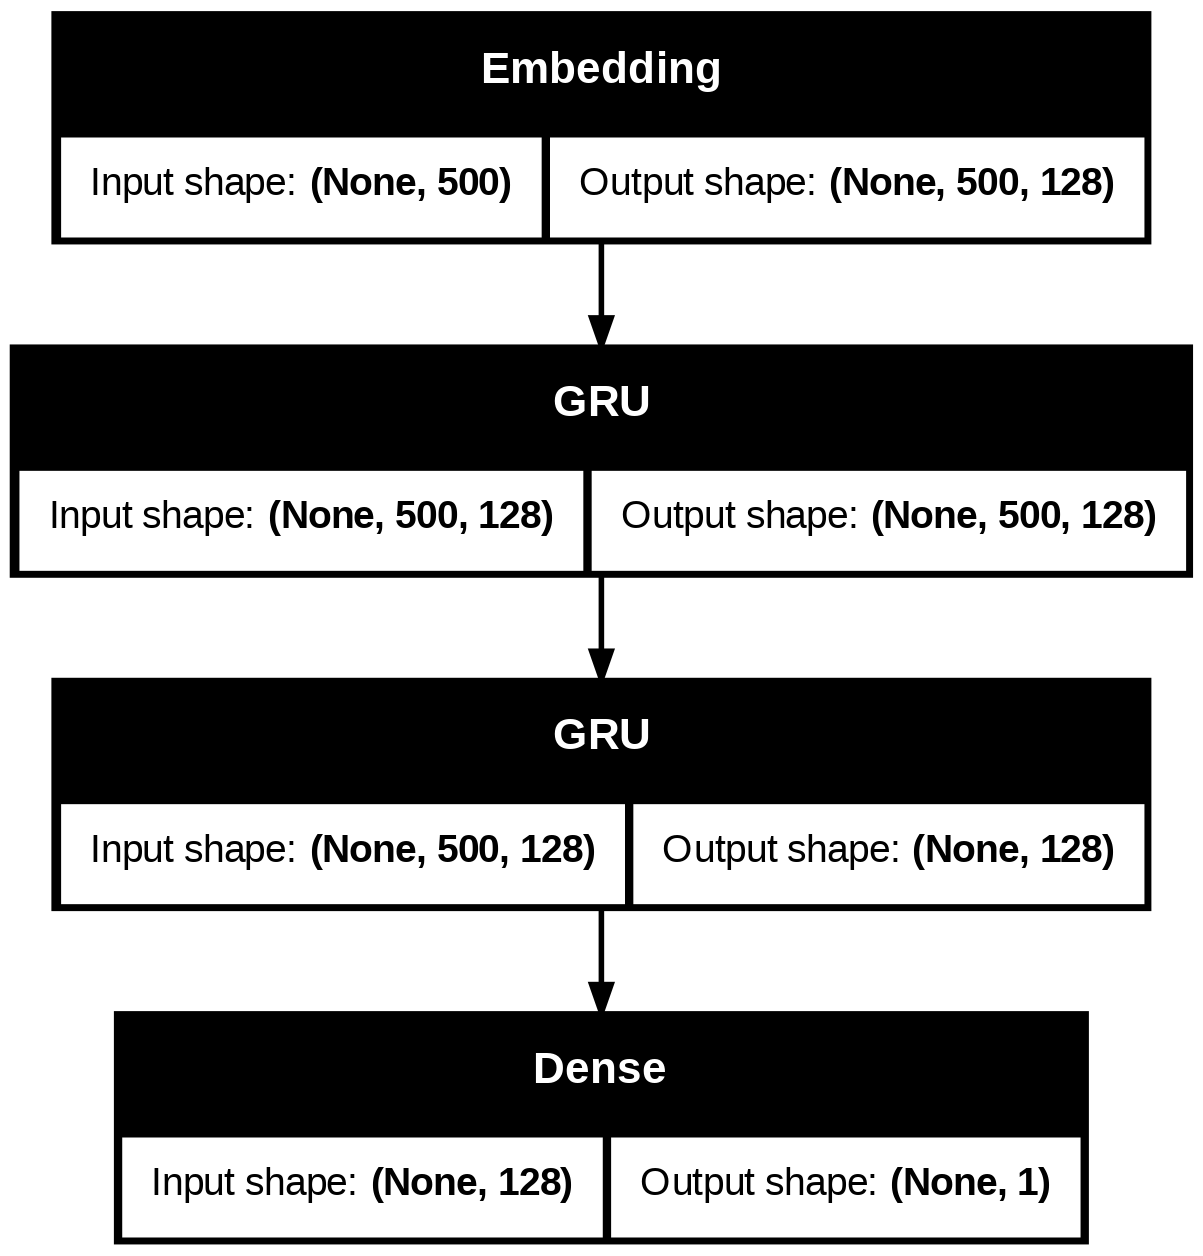

In [12]:
# Create the model
model = keras.models.Sequential([
    keras.layers.Embedding(top_words, 128, input_shape= [max_words]), # 5000, 128, 500
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")
])

print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


In [13]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6735 - loss: 0.5786 - val_accuracy: 0.8278 - val_loss: 0.3921
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8396 - loss: 0.3630 - val_accuracy: 0.8678 - val_loss: 0.3191
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8996 - loss: 0.2535 - val_accuracy: 0.8828 - val_loss: 0.2991
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9368 - loss: 0.1702 - val_accuracy: 0.8844 - val_loss: 0.2854
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9514 - loss: 0.1305 - val_accuracy: 0.8780 - val_loss: 0.3207
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9710 - loss: 0.0855 - val_accuracy: 0.8740 - val_loss: 0.3629
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.9833 - loss: 0.0577 - val_accuracy: 0.8754 - val_loss: 0.4040
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9870 - loss: 0.0441 - 

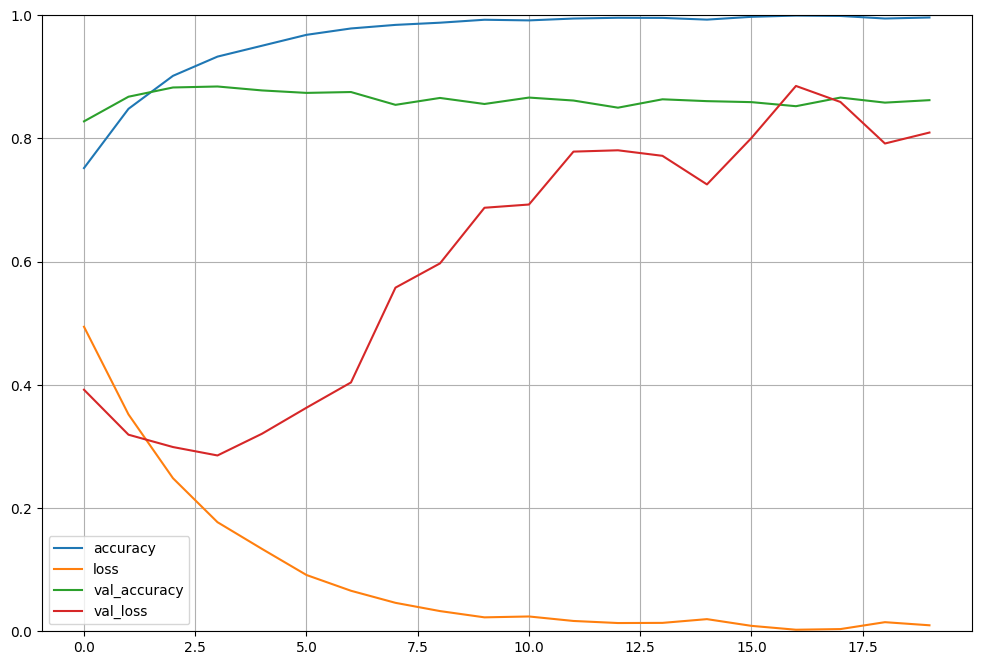

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8607 - loss: 0.8244
Loss     :  0.7891972064971924
accuracy :  0.8644400238990784


In [14]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step
Classification report : 
               precision    recall  f1-score   support

    Negative       0.87      0.85      0.86     12500
    Positive       0.86      0.88      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

Confusion matrix : 



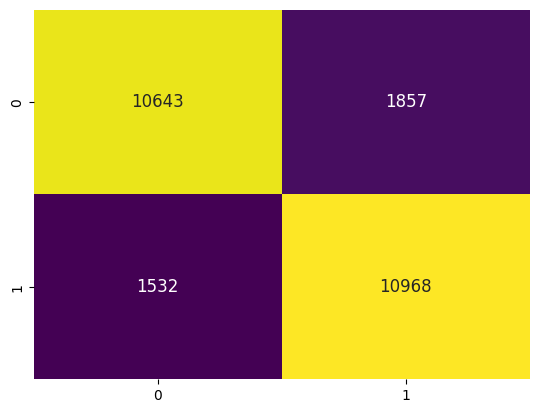

Normalized confusion matrix : 



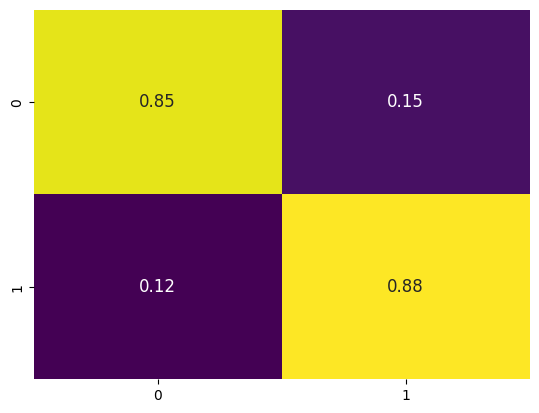

In [15]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["Negative","Positive"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


# Make predictions
# predicted = model.predict(X_new)

# Save the model
# model.save("/content/my_model.h5")


In [16]:
# examples : https://academichelp.net/samples/academics/reviews/movie/

vocabulary = np.unique(np.hstack(X))

def reviewToseq(review, vocabulary, max_words):
    word_to_id = keras.datasets.imdb.get_word_index()
    lstwords = keras.preprocessing.text.text_to_word_sequence(review)
    seq = []
    for word in lstwords:
        id = word_to_id.get(word)
        if id in vocabulary :
            seq.append(id)
        else:
            seq.append(0)
    seq = keras.preprocessing.sequence.pad_sequences([seq], maxlen= max_words)
    return seq

while True :
    print("Enter y/n :")
    x = input()
    if x == "n":
        break
    print("Review : ")
    review = input()
    seq = reviewToseq(review, vocabulary, max_words)
    # print("seq : \n",seq)
    print("----------------------------")
    # Use model.predict() and convert probabilities to class labels
    predictions = model.predict(seq)
    cls = (predictions > 0.5).astype("int32")[0]
    print("Class : ", cls)
    print("----------------------------")


Enter y/n :
ر
Review : 
n
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
----------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Class :  [1]
----------------------------
Enter y/n :
n


# **BERT**

In [17]:
# https://huggingface.co/transformers/model_doc/bert.html
!pip install transformers

In [18]:
# Use the PyTorch class instead of the TensorFlow class
from transformers import BertTokenizer, BertForSequenceClassification

MODEL_NAME = "bert-base-uncased"
# Note the class: BertForSequenceClassification (PyTorch)
bert_model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2
)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# In PyTorch, you won't use .summary() in the same way, but the model will load.
print(bert_model)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [19]:
# Convert Text to Tokens
sample_txt = "Natural language processing"
tokens    = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Sentence : ",sample_txt)
print("Tokens   : ",tokens)
print("Token IDs: ", token_ids)
print("tokens   : \n",tokenizer.convert_ids_to_tokens(token_ids))


Sentence :  Natural language processing
Tokens   :  ['natural', 'language', 'processing']
Token IDs:  [3019, 2653, 6364]
tokens   : 
 ['natural', 'language', 'processing']


In [20]:
import tensorflow as tf

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data, MAX_LEN):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids       = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # "encode_plus" will:
        #    (1) Tokenize the sentence
        #    (2) Add the "[CLS]" and "[SEP]" token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add "[CLS]" and "[SEP]"
            max_length=MAX_LEN,             # Max length to truncate/pad
            padding="max_length", # padding=True or padding="longest" to pad to the longest sequence
                                  # padding="max_length" to pad to a max length.
            #return_tensors="pt",           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get("input_ids"))
        attention_masks.append(encoded_sent.get("attention_mask"))

    # Convert lists to tensors
    input_ids = tf.convert_to_tensor(input_ids)
    attention_masks = tf.convert_to_tensor(attention_masks)

    return input_ids, attention_masks

#-------------------------------------------------------------------------------
texts = ["I love Algeria", "machine learning", "Artificial intelligence", "AI"]
input_ids, attention_masks = preprocessing_for_bert(texts, 5)
print(input_ids)
print(attention_masks)


tf.Tensor(
[[  101  1045  2293 11337   102]
 [  101  3698  4083   102     0]
 [  101  7976  4454   102     0]
 [  101  9932   102     0     0]], shape=(4, 5), dtype=int32)
tf.Tensor(
[[1 1 1 1 1]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 0 0]], shape=(4, 5), dtype=int32)


## **Arabic**

In [21]:
# https://github.com/aub-mind/arabert
!pip install farasapy
!pip install pyarabic

!git clone https://github.com/aub-mind/arabert.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.7 MB/s eta 0:00:00
Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 600 (delta 38), reused 45 (delta 30), pack-reused 535 (from 1)
Receiving objects: 100% (600/600), 9.14 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (339/339), done.


In [22]:
from arabert.preprocess import ArabertPreprocessor

model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

text = ["ولن نبالغ إذا قلنا إن هاتف أو كمبيوتر المكتب في زمننا هذا ضروري"]

preprocessed_text = arabert_prep.preprocess(text)
print(preprocessed_text)


/content/arabert/preprocess.py:398: SyntaxWarning: invalid escape sequence '\`'
  text = re.sub(WHITE_SPACED_BACK_QUOTATION_REGEX, "\`" + r"\1" + "\`", text)
/content/arabert/preprocess.py:398: SyntaxWarning: invalid escape sequence '\`'
  text = re.sub(WHITE_SPACED_BACK_QUOTATION_REGEX, "\`" + r"\1" + "\`", text)
/content/arabert/preprocess.py:492: SyntaxWarning: invalid escape sequence '\d'
  "(\d+)([\u0621-\u063A\u0641-\u064A\u066A-\u066C\u0654-\u0655]+)",
/content/arabert/preprocess.py:497: SyntaxWarning: invalid escape sequence '\d'
  "([\u0621-\u063A\u0641-\u064A\u066A-\u066C\u0654-\u0655]+)(\d+)",
/content/arabert/preprocess.py:558: SyntaxWarning: invalid escape sequence '\['
  "([^0-9\u0621-\u063A\u0641-\u064A\u0660-\u0669a-zA-Z\[\]])",
/content/arabert/preprocess.py:565: SyntaxWarning: invalid escape sequence '\d'
  "(\d+)([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)", r" \1 \2 ", text
/content/arabert/preprocess.py:568: SyntaxWarning: invalid escape sequence '\d'
  "([\u0621-\

100%|██████████| 241M/241M [06:29<00:00, 619kiB/s]


[2025-11-23 09:02:15,106 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


' و+ لن نبالغ إذا قل +نا إن هاتف أو كمبيوتر ال+ مكتب في زمن +نا هذا ضروري '


In [23]:
"""
from transformers import AutoTokenizer, AutoModel
arabert_tokenizer = AutoTokenizer.from_pretrained(model_name)
arabert_model     = AutoModel.from_pretrained(model_name)
"""

from transformers import BertTokenizer,  BertForSequenceClassification #TFBertForSequenceClassification ,BertTokenizer,

model_name = "aubmindlab/bert-base-arabertv2"
arabert_tokenizer = BertTokenizer.from_pretrained(model_name)
arabert_model     = BertForSequenceClassification.from_pretrained(model_name)

tokenized_text = arabert_tokenizer.tokenize(preprocessed_text)
print("len : ",len(tokenized_text))
print("tokenized_text : ",tokenized_text)


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


len :  19
tokenized_text :  ["'", 'و+', 'لن', 'نبالغ', 'إذا', 'قل', '+نا', 'إن', 'هاتف', 'أو', 'كمبيوتر', 'ال+', 'مكتب', 'في', 'زمن', '+نا', 'هذا', 'ضروري', "'"]


In [24]:
input = arabert_tokenizer.convert_tokens_to_ids(tokenized_text)
print("len : ",len(input))
print("input : ",input)


len :  19
input :  [41, 29, 1023, 28880, 985, 1457, 8, 348, 3259, 347, 4989, 20, 1186, 289, 2407, 8, 387, 3368, 41]


# **Sentiment Analysis with BERT**

In [25]:
!wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/refs/heads/master/IMDB-Dataset.csv

--2025-11-23 09:02:30--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/refs/heads/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M   372MB/s    in 0.2s    

2025-11-23 09:02:32 (372 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



In [26]:
import pandas as pd
# Load data and set labels


data = pd.read_csv("/content/IMDB-Dataset.csv")

# Display dimensions of dataframe
print(data.shape)
print(data.info())

print("-----------------------------------------------------------------------")
# value_counts() function : Return a Series containing counts of unique values.
print("Sentiment        : \n",data["sentiment"].value_counts())

print("-----------------------------------------------------------------------")
# Display 10 random samples
print(data.sample(10))


(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
-----------------------------------------------------------------------
Sentiment        : 
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64
-----------------------------------------------------------------------
                                                  review sentiment
13547  The basic plot in this movie isn't bad. A lady...  negative
22903  The back cover of the DVD (missed this one whe...  negative
18776  I really have to say, this was always a favori...  positive
14391  This movie is not for those expecting a martia...  positive
34103  After having seen a lot of Greek movies I feel...  positive
34315  I never understood why some peop

In [27]:
# Set up GPU for training
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"There are {torch.cuda.device_count()} GPU(s) available.")
    print("Device name:", torch.cuda.get_device_name(0))

else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")


There are 1 GPU(s) available.
Device name: Tesla T4


In [28]:
!nvidia-smi

Sun Nov 23 09:02:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             32W /   70W |     698MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
# Mapping of data feature values
data_copy = data.copy()
data_copy["sentiment"] = data_copy["sentiment"].map({"negative":0, "positive":1})

# Display 5 random samples
print(data_copy.sample(5))

print("-----------------------------------------------------------------------")
# X and Y for our data
X = data_copy["review"].values
Y = data_copy["sentiment"].values
print("X: ",X.shape, " Y: ",Y.shape)

# Find the maximum length
max_len = max([len(sent) for sent in X])
print("Max length: ", max_len)

print("-----------------------------------------------------------------------")
# shuffle the dataset
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X,
              Y, test_size= 0.30, random_state=100, stratify=Y)

X_test, X_val, y_test, y_val = train_test_split(X_test_val,
              y_test_val, test_size= 0.40, random_state=100, stratify=y_test_val)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)
print("X_val   = ",X_val.shape ," y_val = ", y_val.shape)


                                                  review  sentiment
23932  Lucille Ball tries to look 30 years younger th...          0
22684  This film is the smartest comedy I have ever s...          1
34866  I've now seen this one about 10 times, so ther...          1
6990   Being an Israeli Jew of naturally sarcastic na...          1
6648   I watched this movie which I really thought ha...          0
-----------------------------------------------------------------------
X:  (50000,)  Y:  (50000,)
Max length:  13704
-----------------------------------------------------------------------
X_train =  (35000,)  y_train =  (35000,)
X_test  =  (9000,)  y_test =  (9000,)
X_val   =  (6000,)  y_val =  (6000,)


In [30]:
# Create a function to tokenize a set of texts
def construct_encodings(data, tokenizer, max_len, trucation=True, padding=True):
  return tokenizer(data, max_length=max_len, truncation=trucation, padding=padding)

#-------------------------------------------------------------------------------
max_len = 128

train_inputs = construct_encodings(X_train.tolist()[0:1000], tokenizer, max_len)
val_inputs   = construct_encodings(X_val.tolist()[0:200], tokenizer, max_len)
test_inputs  = construct_encodings(X_test.tolist()[0:200], tokenizer, max_len)

print("Done ...")

Done ...


In [32]:
"""
converting our encodings and y (which holds the classes of the reviews)
into a Tensorflow Dataset object.
we can use : history = bert_model.fit(X_train1, y_train
this technique is faster during the training task

convert "tensor" to array
def tensorToarray(tensor):
  proto_tensor = tf.make_tensor_proto(tensor)
  return tf.make_ndarray(proto_tensor)

Below is a function to do this:
"""

def construct_tfdataset(encodings, y=None):
  if y:
    return tf.data.Dataset.from_tensor_slices((dict(encodings),y))
  else:
    # this case is used when making predictions on unseen samples after training
    return tf.data.Dataset.from_tensor_slices(dict(encodings))

#-------------------------------------------------------------------------------
tfdataset_train = construct_tfdataset(train_inputs, y_train.tolist())
tfdataset_val   = construct_tfdataset(val_inputs, y_val.tolist())
tfdataset_test  = construct_tfdataset(test_inputs, y_test.tolist())


BATCH_SIZE = 32

tfdataset_train = tfdataset_train .shuffle(X_train.shape[0])
tfdataset_train = tfdataset_train.batch(BATCH_SIZE)

tfdataset_val   = tfdataset_val .shuffle(X_val.shape[0])
tfdataset_val   = tfdataset_val.batch(BATCH_SIZE)

tfdataset_test  = tfdataset_test .shuffle(X_test.shape[0])
tfdataset_test  = tfdataset_test.batch(BATCH_SIZE)

print("Done ...")


Done ...


In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
bert_model.compile(optimizer=optimizer,
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=["accuracy"])

# Training the model
history = bert_model.fit(tfdataset_train, epochs=5, batch_size=BATCH_SIZE, validation_data=tfdataset_val)


TypeError: compile() got an unexpected keyword argument 'optimizer'

In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = bert_model.evaluate(tfdataset_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


In [ ]:
# Confusion Matrix
tfdataset_test_CM  = construct_tfdataset(test_inputs) # without y_test
tfdataset_test_CM  = tfdataset_test_CM.batch(BATCH_SIZE)

tf_outputs = bert_model.predict(tfdataset_test_CM)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
y_pred = tf.argmax(tf_predictions, axis=1)
y_pred = y_pred.numpy()

class_names = ["Negative","Positive"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


In [ ]:
# Make predictions
def create_predictor(text, model, tokenizer, max_len):
  x = [text]
  encodings  = tokenizer(x, max_length=max_len, truncation=True, padding=True)
  tfdataset  = construct_tfdataset(encodings)
  tfdataset  = tfdataset.batch(1)

  tf_outputs = model.predict(tfdataset)
  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
  proto_tensor   = tf.make_tensor_proto(tf_predictions)
  tf_predictions = tf.make_ndarray(proto_tensor)

  return tf_predictions[0]

#-------------------------------------------------------------------------------
pred_sentences = ["This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good",
                  "One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie"]

class_names = ["Negative","Positive"]
for text in pred_sentences:
  print("---------------------------------------------------------------------")
  predict_proba = create_predictor(text, bert_model, tokenizer, 128)
  print(text)
  max_value = max(predict_proba)
  max_index = predict_proba.tolist().index(max_value)
  print("predict_proba : ",predict_proba," \nclass : ",class_names[max_index])



In [ ]:
import pickle
bert_model.save_pretrained("/content/gdrive/MyDrive/my_bert_model")

MODEL_NAME = "bert-base-uncased"
MAX_LEN = 128

with open("/content/gdrive/MyDrive/my_bert_model/info.pkl", "wb") as f:
    pickle.dump((MODEL_NAME, MAX_LEN), f)

print("Done ...")


# **Inference**

In [ ]:
# Inference

# !pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle

my_model = BertForSequenceClassification.from_pretrained("/content/gdrive/MyDrive/My_models/my_bert_model")
model_name, max_len = pickle.load(open("/content/gdrive/MyDrive/My_models/my_bert_model/info.pkl", "rb"))

my_tokenizer = BertTokenizer.from_pretrained(model_name)

print("Done ...")


Some layers from the model checkpoint at /content/gdrive/MyDrive/My_models/my_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/gdrive/MyDrive/My_models/my_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Done ...


In [ ]:
# Make predictions
pred_sentences = ["This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good",
                  "One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie"]

#-------------------------------------------------------------------------------
def construct_tfdataset(encodings, y=None):
  if y:
    return tf.data.Dataset.from_tensor_slices((dict(encodings),y))
  else:
    # this case is used when making predictions on unseen samples after training
    return tf.data.Dataset.from_tensor_slices(dict(encodings))
#-------------------------------------------------------------------------------
def create_predictor(text, model, tokenizer, max_len):
  x = [text]
  encodings  = tokenizer(x, max_length=max_len, truncation=True, padding=True)
  tfdataset  = construct_tfdataset(encodings)
  tfdataset  = tfdataset.batch(1)

  tf_outputs = model.predict(tfdataset)
  # print(" 1 *********** : ",tf_outputs)
  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
  # print(" 2 *********** : ",tf_predictions)
  proto_tensor = tf.make_tensor_proto(tf_predictions)
  tf_predictions = tf.make_ndarray(proto_tensor)
  # print(" 3 *********** : ",tf_predictions)

  return tf_predictions[0]

#-------------------------------------------------------------------------------
class_names = ["Negative","Positive"]
for text in pred_sentences:
  print("---------------------------------------------------------------------")
  predict_proba = create_predictor(text, my_model, my_tokenizer, max_len)
  print(text)
  max_value = max(predict_proba)
  max_index = predict_proba.tolist().index(max_value)
  print("predict_proba : ",predict_proba," \nclass : ",class_names[max_index])


---------------------------------------------------------------------
This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good
predict_proba :  [0.01937334 0.98062664]  
class :  Positive
---------------------------------------------------------------------
One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie
predict_proba :  [9.9982482e-01 1.7521986e-04]  
class :  Negative


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 24.1 MB/s 
     |████████████████████████████████| 141 kB 67.4 MB/s 
     |████████████████████████████████| 272 kB 65.4 MB/s 
     |████████████████████████████████| 84 kB 1.5 MB/s 
     |████████████████████████████████| 212 kB 79.5 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 2.3 MB 70.6 MB/s 
     |████████████████████████████████| 54 kB 1.2 MB/s 
     |████████████████████████████████| 57 kB 3.3 MB/s 
     |████████████████████████████████| 63 kB 918 kB/s 
     |████████████████████████████████| 80 kB 6.0 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 43 kB 864 kB/s 
     |████████████████████████████████| 856 kB 35.6 MB/s 
     |████████████████████████████████| 4.1 MB 58

In [ ]:
# https://gradio.app/

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests


def inference(text):
  max_len = 128
  x = [text]

  encodings  = my_tokenizer(x, max_length=max_len, truncation=True, padding=True)
  tfdataset  = tf.data.Dataset.from_tensor_slices(dict(encodings))
  tfdataset  = tfdataset.batch(1)

  tf_outputs = my_model.predict(tfdataset)

  tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
  proto_tensor   = tf.make_tensor_proto(tf_predictions)
  tf_predictions = tf.make_ndarray(proto_tensor)

  labels = ["Negative","Positive"]
  dictionary = dict(zip(labels, map(float, tf_predictions[0])))

  return dictionary


nbr_top_classes = 2
gr.Interface(fn=inference,
             inputs="textbox",
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes),
             theme="dark").launch(share=True) #, debug=True Use in Colab


/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/interface.py:313: UserWarning: Currently, only the 'default' theme is supported.
  warnings.warn("Currently, only the 'default' theme is supported.")


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://58605.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f9c43ac4810>,
 'http://127.0.0.1:7860/',
 'https://58605.gradio.app')